# 2. Statistical Learning

## 2.1 What is statistical learning?

- input variables : predictors, independent variables, features

- output variables : response, depedent variables


$$ Y = f(X) + \epsilon $$

### 2.1.1 Why estimate f?

Prediction 
---
$ \hat{f}(X) = \hat{Y} $
- reducible error : improve acc. by using the most appropriate statiscal learning technique
- irreducible error \epsilon : cannot be predicted using X
  - may contain unmeasured varibles

$$ 
E(T-\hat(T))^2\  =\ E[f(X)+\epsilon - \hat{f}(X)]^2 = [f(X)-\hat{f}]^2 + Var(\epsilon)
$$
- The focus of this book is on techniques ofr estimating f with the aim of minimizing the reducible value

Inference
---
- Which predictors are associated with the response?
- What is the relationship between the response and each predictor?
- Can the relationship between T and each predictor be adequately summarized using a linear equation, or is the relationship more complicated?
  

### 2.1.2 How do we estimate f?
- training data : use observations to train, or teach, our method how to estimate f.
- to apply a statistical learning method to the training data in order to estimate the unknown function f.

Parametric Methods
---
1. Make an assumption about the functional form of f.
2. Need a procedure that uses the training data to fit or train the model.

- parametric : reduces the problem of estimating f down to one of estimating a set of parameters
  - simplifies the problem because much easier to estimate a set of parameters
  - the model we choose will usually not match the true unkonwn form of f
  - More complex models can lead to a *overfitting* the data : follow noise too closely


Non-parametric methods
---
- Do not make explicit assumptions about the functional form of f
- seek an estimate of f that gets as close to the data points as possoble without being too rough : by avoiding the assumption of a particular functional form for f, potent to accurately fit a wider range of possible shapes for a.
- since they do not reduce the problem of estimating f to a small number of parameters, a very large number of observations is required. 

### 2.1.3 Trade-off Between Prediction Accuracy and Model interpretablity
- Restrictive models are much more interpretable.
- Flexible models are more accurate

### 2.1.4 Supervised VS Unsupervised Learning
- supervised : for each observation of the predictor measurement, there is an associated response measurement
- unsupervised : a measurements has no associated response


### 2.1.5 Regression VS Classification
- quantitative variables : numerical values
- qualitative variables : take on values in one of K different categories.
- regression : problems with a quantitative response
- classification : problems with a qualitative response

## 2.2 Assessing Model Accuracy
### 2.2.1 Measuring the Quality of Fit
- Mean Squared error : $MSE = \frac{1}{n} \sum^n_{i=1}(y_i=\hat{f}(x_i))^2 $
  - interested in the accuracy of the predictions that we obtain when we apply our method to previously unseen test data
  - degrees of freedom : a function of flexibility -> restricted and smooth curve has fewer degrees of freedom

### 2.2.2 The bias-variance trade-off
- $ E(y_0-\hat{f}(x_0))^2 = Var(\hat{f}(x_0)) + [Bias(\hat{f}(x_0))]^2 + Var(\epsilon) $
  - expected test MSE @ x_0 : average test MSE that we would obtain if we repeatedly estimated f using a larget number of training sets, and tested each @ x_0
  - In order to minimize the expected test error, need to select a statistical learning method that simultaneously achieves low variance & low biase
  - expected test MSE never lise below Var($\epsilon$)
- Variance : amount by which $\hat{f}$ would change if we estimated it using a different training data set.
- Bias : the error that is introduced by approximating a real-life problem by a much impler model.
- More flexible methods, the variance will increaase and the bias will decrease.

### 2.2.3 The cliassification setting

- error rate : the proportion of mistakes that are made if wee apply our estimate $\hat{f}$ to the training observations
$$ \frac{1}{n}\sum^n_{i=1}(I(y_i)\neq\hat{y}_j) $$ 
=> fraction of incorrect classifications, training error rate since it is computed based on the data that was used to torain our classifier
  $I(y_i)\neq\hat{y} _j$ : indicater variable
- test error rate : $ Ave(I(y_0\neq\hat{y}_0)) $
- Bayes Classifier : the test error rate is minimized, on averate, by a very simple classifier that assgins each observation to the most likely class, given its predictor values.
  - assign a test observation with $x_0$ to the class j for the conditional propabaility $Pr(Y=j|X=x_0)$ is largest
  - overall Bayes error rate : $1-E({max}_jPr(Y=j|X))$
- KNN : K-Nearest Neighbors
  - we normally don't know conditional tistribution, so computing Bayes classifier is impossible -> estimate that
  - fraction of points in $N_0$ whose response values equal j : classifies the test observation to the class with the largest probability
$$ Pr(Y=j|X=x_0) =\frac{1}{K}\sum_{i\in N_0}I(y_i=j)$$
  - choice of K has drastic effect : As K grows, the method becomes less flexible and produces a decision boundary that is a low-variance but high-bias classifier


## Exercise 10

In [7]:
# (a) read boston data set
import pandas as pd

df = pd.read_csv('../data/boston.csv', index_col="Unnamed: 0")
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


In [14]:
df['zn']

1      18.0
2       0.0
3       0.0
4       0.0
5       0.0
       ... 
502     0.0
503     0.0
504     0.0
505     0.0
506     0.0
Name: zn, Length: 506, dtype: float64

In [17]:
predictors = set(df.columns) - set(df['crim'])

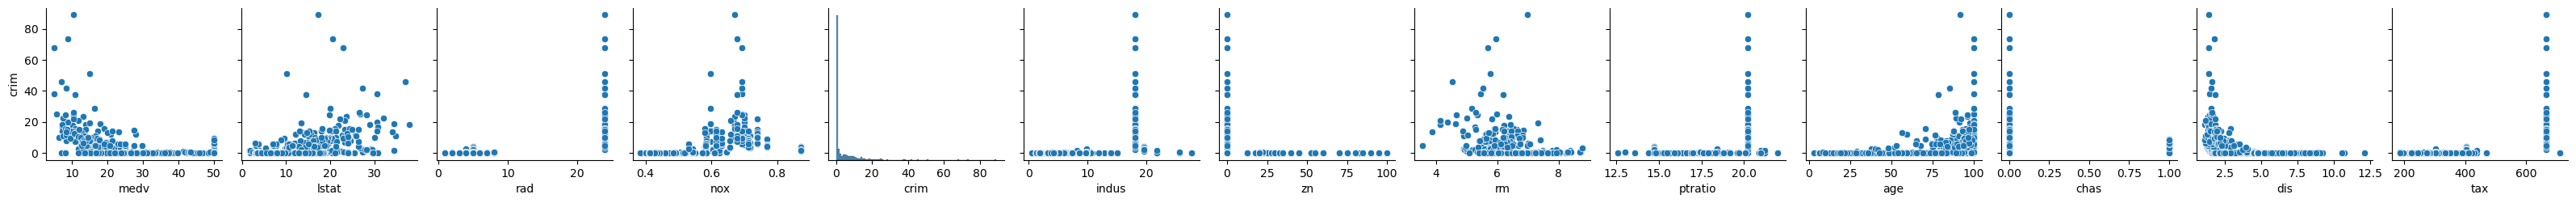

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df, x_vars=predictors, y_vars='crim')